<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/4_1_1_Molecular_databases_PubChem_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PubChem data acquisition**

---
Made by: Armando Rufino, Fernanda Saldivar and Karen Pelcastre

Contact: fer.saldivarg@gmail.com

**Last Update:** March 2025


#Contents
---

>[PubChem data acquisition](#scrollTo=g1pg7sxsI_7a)

>[Contents](#scrollTo=bkXcqNI76IRk)

>[Objectives](#scrollTo=rlbtele579tP)

>[Introduction](#scrollTo=axEGF3jzDXbe)

>[Solved exercises](#scrollTo=0bKjcMRgCIib)

>>[1- Obtain the CID of a compound from its name](#scrollTo=Q1fezJDqyFK_)

>>[2- Obtain the CID of a compound from its structure](#scrollTo=DhYHf_aPB0bM)

>>>[2.1 Obtain the CID of the shikimic acid from its SMILES](#scrollTo=FGyi_gPgiRaP)

>>>[2.2 Obtain the SMILE of the shikimic acid from its CID](#scrollTo=YJIBUsQAQuhg)

>>[3- Obtain the number of CIDs of a molecular formula](#scrollTo=1jzrpAHqET0H)

>>>[3.1 Obtain the number of CIDs of the same molecular formula (C7H10O5, shikimic acid molecular formula).](#scrollTo=iePRaEAUWAFf)

>>[4- Obtain 2D structure of a chemical compound](#scrollTo=9vwjklMK0P5O)

>>>[4.1 Obtain the 2D structure of the shikimic acid through its CID](#scrollTo=rsMWHPnWS44d)

>>[5- Obtain properties from its CID](#scrollTo=_P-mnQBSy2rK)

>>>[5.1 Obtain the molecular weight of the shikimic acid through its CID](#scrollTo=_R3vyTLfO9yA)

>>[6- Obtain multiple properties from the same CID](#scrollTo=Js95DrJGFuQS)

>>>[6.1 Obtain the molecular formula, molecular weight and XLogP properties, through its CIDs.](#scrollTo=yrdTSIAwZvlt)

>>[7- Obtain different chemical identifiers and show differences in them.](#scrollTo=4KaNt6xWqg9w)

>>>[7.1 Obtain the different identifiers for the shikimic acid.](#scrollTo=Qzdi6kgQr7yt)

>>[8- Obtain assays through CIDs and AIDs](#scrollTo=a-xdp_XYQga9)

>>>[8.1 Obtain a summary of the assays for the shikimic acid](#scrollTo=fu78Ps42_O0b)

>>>[8.2 Obtain the assay for the shikimic acid through the AID](#scrollTo=0yPo2hAgrK71)

>>[9- Similarity exercise](#scrollTo=K0GX4cep4q7T)

>>[10- Obtain compounds with 2D similarity from SMILES](#scrollTo=FM1GoQ8BB9Kx)

>>>[10.1 Obtain CIDs from compounds with 99% 2D similarity for the shikimic acid molecule from its SMILES](#scrollTo=EGU0fvaKczcZ)

>>>[10.2 Obtain CIDs from compounds with 85% 2D similarity for the shikimic acid molecule from its SMILES using a function.](#scrollTo=Bb29qF-R5ZOA)

>>>[10.3 Make an exercise where you can compare a same search with 95%, but with the difference of “threshold” and “Threshold”.](#scrollTo=Uc0dec_Rpgrz)

>>[11- Obtain number of CIDs given by “substructure” of a compound from its SMILES.](#scrollTo=7Rer_IlJ0yyg)

>>>[11.1 Obtain for the shikimic acid through its SMILES, the number of CIDs that have in superstructure and substructure.](#scrollTo=g5Uk0B0VghJQ)

>>>[11.2 Obtain for the shikimic acid through its SMARTS, the number of CIDs that have in superstructure and substructure.](#scrollTo=TKEgiQUk7ong)

>[For more information:](#scrollTo=WbXDf_fy_1hD)



# Objectives


---
+ Get familiar with the use of `PUG-REST` to access available information in PubChem through programming.


* Identify the type of information available and the different search types that can be made, in such a way that the search for information is made in an efficient and simple way.

* Exemplify the acquisition of different types of information available in PubChem.

#Introduction
---

[PubChem](https://pubchem.ncbi.nlm.nih.gov/) is an open access database maintained by the National Institutes of Health (NIH) of the United States. PubChem provides information about most of the molecules, such as nucleotides, carbohydrates, lipids, peptides, chemically modified macromolecules and small molecules, storing data of their identifiers, chemical structures, chemical and physical properties, biological activity, patents and toxicological information. The information stored by PubChem is collected from hundreds of sources , including government agencies, chemical suppliers and research papers.

As of the month of making of this colab (March 2025), PubChem provides more than 119 million compounds with unique chemical structures and more than 328 million substances, being one of the main sources of chemical entities to the scientific community. PubChem also allows us access to information related to compounds like bioassays, bioactivities, genes, proteins, taxonomies, sequences and patents.  

 To access PubChem through programming there are two methods, using  [PUG-REST](https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest) and [PUG-View](https://pubchemdocs.ncbi.nlm.nih.gov/pug-view). In this colab we will use [PUG-REST](https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest), a web interface that gives access to PubChem data and services.

 The implied format for the search in PUG-REST, is divided in three main sections: **Input**, **Operation** and **Output**.

The following figure explains the main specifications that can be made in each of these sections.

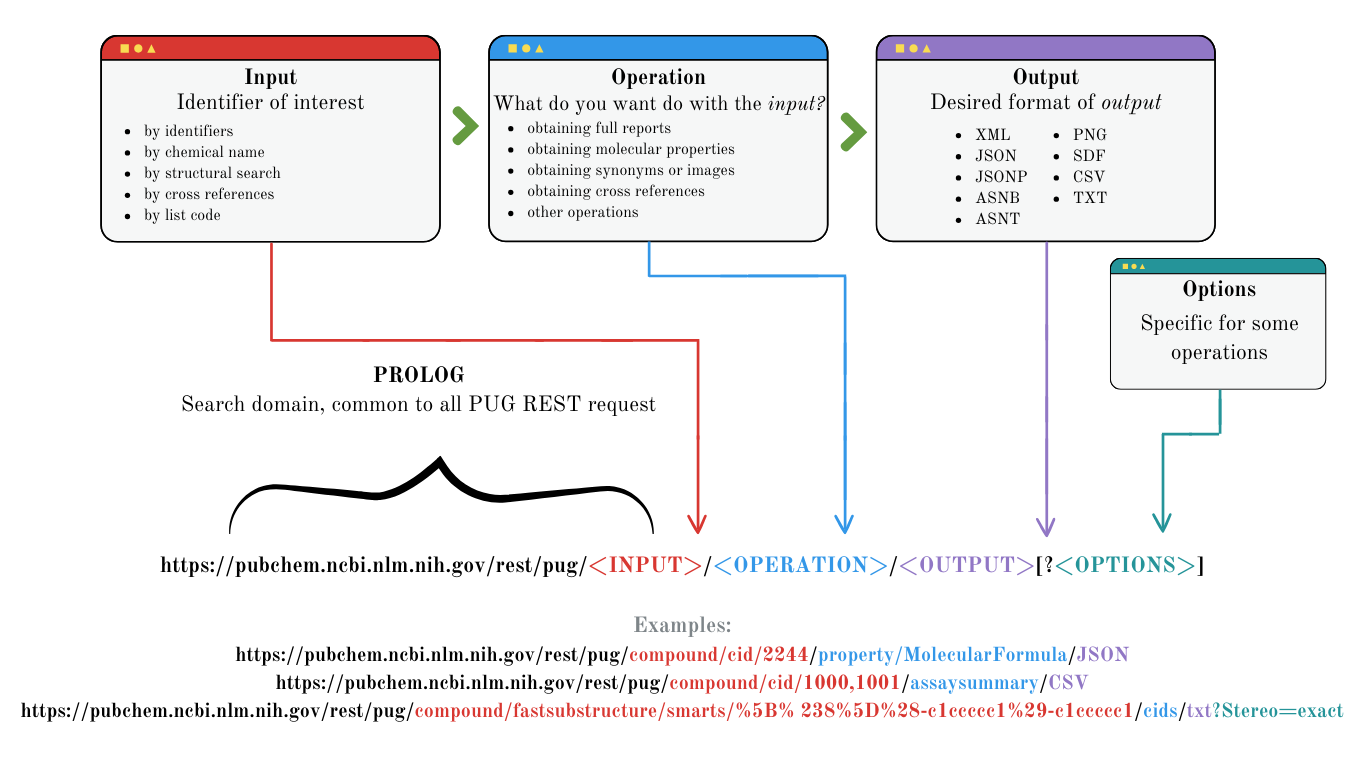

**Figure 1.** Construction of searches in PubChem. Figure recovered from  [*Nucleic Acids Res.* 2015;43(W1):W605-W611](https://academic.oup.com/nar/article/43/W1/W605/2467896?login=false)

# Solved exercises

---



The following are examples with two main focuses, show the search, format and information that can be acquired in PUG-REST, and on the other hand, multiple ways to acquire data through Python programming language , in the Google Colaboratory platform.

For the PubChem data acquisition process through PUG-REST, we will use the next libraries.

[RDKit](https://www.rdkit.org/): Has open code tools for applications in chemoinformatics.

[Matplotlib](https://matplotlib.org/): Used to create static, animates or interactive visualizations in Python.

[Sys]( https://docs.python.org/3/library/sys.html):
Its function is to provide access to variables and functions used to manage the different parts of the Python environment.

[Os]( https://www.geeksforgeeks.org/os-module-python-examples/):
Used to easily interact with the operating systems and its files.

[NumPy](https://numpy.org/about/):
Used in mathematic functions, random numbers generation, Fourier transformations, etc.

[Pandas]( https://pandas.pydata.org/):
Based in NumPy, it´s used in data analysis, is a powerful tool for data manipulation, provides data structures, numeric tables manipulation, etc.

[Time](https://docs.python.org/3/library/time.html):
Used in time functions, by providing various time or time-related functions, such as `datatime`, `calendar`, `strptime()`, etc.

[urllib.request]( https://docs.python.org/3/library/urllib.request.html):
Used to open URLs (mainly HTTP format), by being able to process authentications, redirections, cookies, etc.

In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import Draw

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

import time
from pathlib import Path
from urllib.parse import quote

from IPython.display import Markdown, Image
import requests

import urllib.request

import io

HERE = Path(_dh[-1])
DATA = HERE / "data"


## 1- Obtain the CID of a compound from its name

*1.1* Obtain the CID of the shikimic acid through its name.

In [ ]:
# input =  "compund/name/{name}"
# operation =  "cids"
# output =  "JSON"

In [ ]:
name = "Shikimic Acid"

url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/JSON"

option =  "none"

r = requests.get(url)
r.raise_for_status()
response = r.json()
if "IdentifierList" in response:
    cid = response["IdentifierList"]["CID"][0]
else:
    raise ValueError(f"Could not find matches for compound: {name}")
print(f"PubChem CID for {name} is:\n{cid}")


PubChem CID for Shikimic Acid is:
8742


Another way of obtaining the **CID** for the Shikimic Acid, is to define the unaltered search domain as *prolog* and add the search specifications (INPUT, Operation and OUTPUT).

In [ ]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug' #Define the unaltered search domain

name = 'Shikimic Acid'
url = prolog + "/compound/name/"+ name + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for Shikimic Acid is:", cids)
#print(cids)

PubChem CID for Shikimic Acid is: ['8742']


##2- Obtain the CID of a compound from its structure

### 2.1 Obtain the **CID** of the shikimic acid from its SMILES

In [ ]:
# input = "/compound/smiles/C1C(C(C(C=C1C(=O)O)O)O)O"
# operation = '/cids/'
# output = "txt"

In [ ]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

url = prolog + "/compound/smiles/" + "C1C(C(C(C=C1C(=O)O)O)O)O" + "/cids/TXT"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for Shikimic Acid is:", cids)

PubChem CID for Shikimic Acid is: ['1094']


**Note**: SMILES and SMARTS sometimes have characters such as: /, [, @, ], etc., that affect the code of a URL. In some cases we will need to add the SMART or SMILES in URL format.

In [ ]:
# input = "/compound/smiles/CCCCCCCCCCCCOS%28%3DO%29%28%3DO%29%5BO-%5D.%5BNa%2B%5D"
# operation = '/cids/'
# output = "txt"

In [ ]:
import urllib.parse  #converts text in URL format
molecule = 'CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+]'
molecule_url= urllib.parse.quote(molecule)

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
url = prolog + "/compound/smiles/" + molecule_url + "/cids/TXT"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for molecule is:", cids)
url

PubChem CID for molecule is: ['3423265']


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/CCCCCCCCCCCCOS%28%3DO%29%28%3DO%29%5BO-%5D.%5BNa%2B%5D/cids/TXT'

###2.2 Obtain the SMILE of the shikimic acid from its CID

In [ ]:
# input =  "/compound/cid/{cid}"
# operation =  "property/CanonicalSMILES/"
# output =  "JSON"

In [ ]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

if "PropertyTable" in response:
    canonical_SMILES = response["PropertyTable"]["Properties"][0]["CanonicalSMILES"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Canonical SMILES for {name} is:\n{canonical_SMILES}")

Canonical SMILES for Shikimic Acid is:
C1C(C(C(C=C1C(=O)O)O)O)O


##3- Obtain the number of CIDs of a molecular formula

###3.1 Obtain the number of CIDs of the same molecular formula (C7H10O5, shikimic acid molecular formula).

In [ ]:
# input = '/compound/fastformula/C7H10O5'
# operation = '/cids/'
# output = "txt"

In [ ]:
query = 'C7H10O5'    # Molecular formula for Crestor (Rosuvastatin: CID 446157)
url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids)) # Prints amount of CIDS


# Number of CIDs: 1382


In [ ]:
print(cids) # Prints CIDS

['8742', '74591', '25775', '5462259', '86962', '69105', '95084', '11116543', '445905', '1094', '90770', '6419726', '6857402', '49867941', '93917', '641720', '168417', '6419727', '118987344', '11819502', '164614090', '11829931', '243418', '21674240', '10986763', '21021682', '6433522', '10844960', '121225551', '23394374', '162676775', '44423276', '3014019', '191045', '3017469', '11332755', '10125106', '11332752', '13245310', '40970370', '71438888', '101711082', '219303', '6436479', '13425804', '57737501', '5460112', '25021178', '10899160', '44276164', '101702189', '10241280', '11789701', '101411204', '156580555', '163018358', '163043139', '163043140', '440268', '6441453', '288574', '568068', '5366068', '13425805', '105532614', '122164268', '5288060', '156583251', '22166425', '10464787', '44123442', '639492', '10975977', '21608065', '60195840', '102034932', '87324', '11030316', '12315498', '13170402', '13408092', '13544399', '13760017', '15837374', '18763714', '19838981', '20030963', '204

It is possible to allow other elements to be present by adding them to the specified formula, as shown below.

In [ ]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)


# Number of CIDs: 3360


##4- Obtain 2D structure of a chemical compound

###4.1 Obtain the 2D structure of the shikimic acid through its CID

In [ ]:
# input =  "/compound/cid/{cid}/"
# output =  "PNG"

The 2D structure of Shikimic Acid:

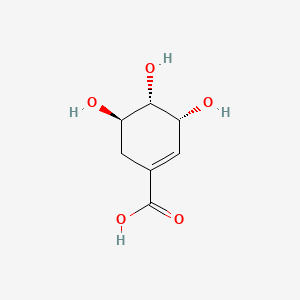

In [ ]:
cid = "8742"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/PNG"

r = requests.get(url)
r.raise_for_status()

display(Markdown("The 2D structure of Shikimic Acid:"))
display(Image(r.content))

In [ ]:
#Save image png
save_image = open('shikimic_acid.png', 'wb')

##5- Obtain properties from its CID

###5.1 Obtain the molecular weight of the shikimic acid through its CID

In [ ]:
# input =  "/compound/cid/{cid}"
# operation =  "property/MolecularWeight/"
# output =  "JSON"

In [ ]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

if "PropertyTable" in response:
    mol_weight = response["PropertyTable"]["Properties"][0]["MolecularWeight"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Molecular weight for {name} is:\n{mol_weight}")

Molecular weight for Shikimic Acid is:
174.15


##6- Obtain multiple properties from the same CID

###6.1 Obtain the molecular formula, molecular weight and XLogP properties, through its CIDs.
The CIDs are: 8003, 8058 and 8900 respectively.

In [ ]:
# input = '/compound/cid/8003,8058,8900'
# operation = '/property/MolecularFormula,MolecularWeight,XLogP'
# output = '/CSV'

In [ ]:
# Import the library necessary for making a web sevice request.
import urllib.request

# Define variables for PUG-REST request URL pieces.
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input = '/compound/cid/8003,8058,8900'
operation = '/property/MolecularFormula,MolecularWeight,XLogP'
output = '/CSV'

# Formulate the PUG-REST request URL
url = prolog + input + operation + output
df1=pd.read_csv(url)

# Print the output.
df1

,CID,MolecularFormula,MolecularWeight,XLogP
0,8003,C5H12,72.15,3.4
1,8058,C6H14,86.18,3.9
2,8900,C7H16,100.20,4.4


Another way to obtain the molecular formula, molecular weight and XLogP properties for the pentane, hexane and heptane are:

In [ ]:
df=pd.read_csv("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/8003,8058,8900/property/MolecularFormula,MolecularWeight,XlogP/CSV", delimiter=",")
df

,CID,MolecularFormula,MolecularWeight,XLogP
0,8003,C5H12,72.15,3.4
1,8058,C6H14,86.18,3.9
2,8900,C7H16,100.20,4.4


##7- Obtain different chemical identifiers and show differences in them.

For a same chemical formula, it is possible to obtain different compounds, either by their connectivity (constitutional isomers) or by the arrangement of the atoms in space (stereoisomers), **Figure 2** shows the classification of isomers in detail.
It is important to consider this information, because for one structure there can be several IDs since isomers are considered.


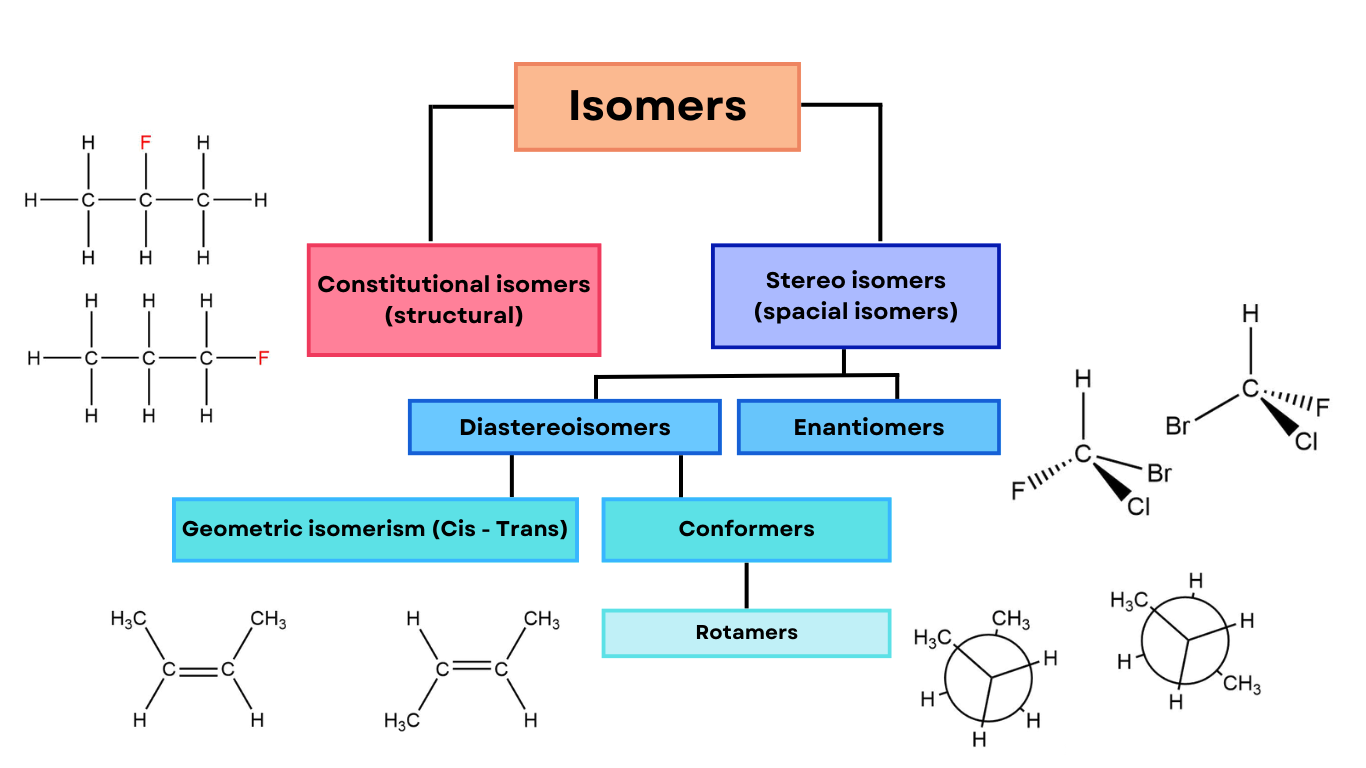

**Figure 2.** Classification of isomers.

###7.1 Obtain the different identifiers for the shikimic acid.

In [ ]:
# input = '/compound/fastidentity/smiles/'
# operation = 'property/isomericsmiles/ ?identity_type=' + myoption
# output = 'CSV'

Identity_type: same_stereo_isotope
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"


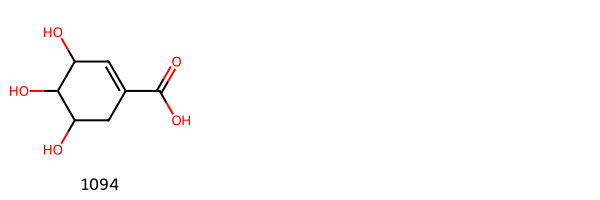

Identity_type: same_stereo
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"


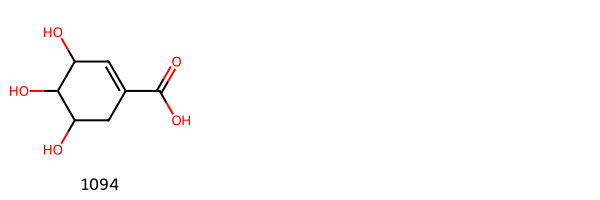

Identity_type: same_isotope
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"
8742 "C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
7076075 "C1[C@@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
10986763 "C1[C@@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
11332752 "C1[C@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
11789701 "C1[C@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
12315498 "C1[C@H](C([C@@H](C=C1C(=O)O)O)O)O"
12315501 "C1[C@@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
16758061 "C1C([C@@H](C(C=C1C(=O)O)O)O)O"
21626190 "C1[C@@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
24202011 "C1[C@@H](C(C(C=C1C(=O)O)O)O)O"
40970370 "C1[C@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
42626655 "C1[C@H]([C@@H](C(C=C1C(=O)O)O)O)O"
49867941 "C1[C@H](C(C(C=C1C(=O)O)O)O)O"
59081897 "C1C([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
69027491 "C1C(C([C@@H](C=C1C(=O)O)O)O)O"


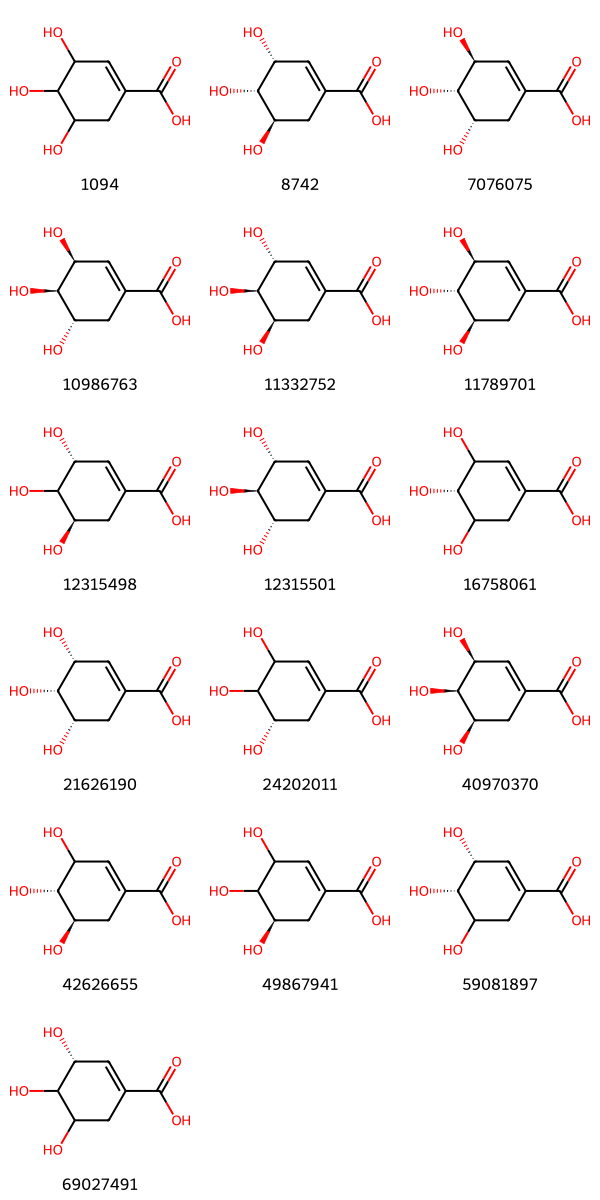

Identity_type: same_connectivity
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"
8742 "C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
7076075 "C1[C@@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
9989730 "[H][C@@]1([C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O)[2H]"
10103663 "[2H][C@@]1(CC(=C[C@H]([C@H]1O)O)C(=O)O)O"
10986763 "C1[C@@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
11332752 "C1[C@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
11789701 "C1[C@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
12315498 "C1[C@H](C([C@@H](C=C1C(=O)O)O)O)O"
12315501 "C1[C@@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
16758061 "C1C([C@@H](C(C=C1C(=O)O)O)O)O"
21626190 "C1[C@@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
24202011 "C1[C@@H](C(C(C=C1C(=O)O)O)O)O"
25239957 "[2H]C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
40970370 "C1[C@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
42626655 "C1[C@H]([C@@H](C(C=C1C(=O)O)O)O)O"
49867941 "C1[C@H](C(C(C=C1C(=O)O)O)O)O"
59081897 "C1C([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
59869331 "[2H][C@@]1([C@@H](CC(=C[C@H]1O)C(=O)O)O)O"
59869332 "[2H][C@]1(C=C(C[C@H]([C@@H]1O)O)C(=O)O)O"
59869334 "[2H

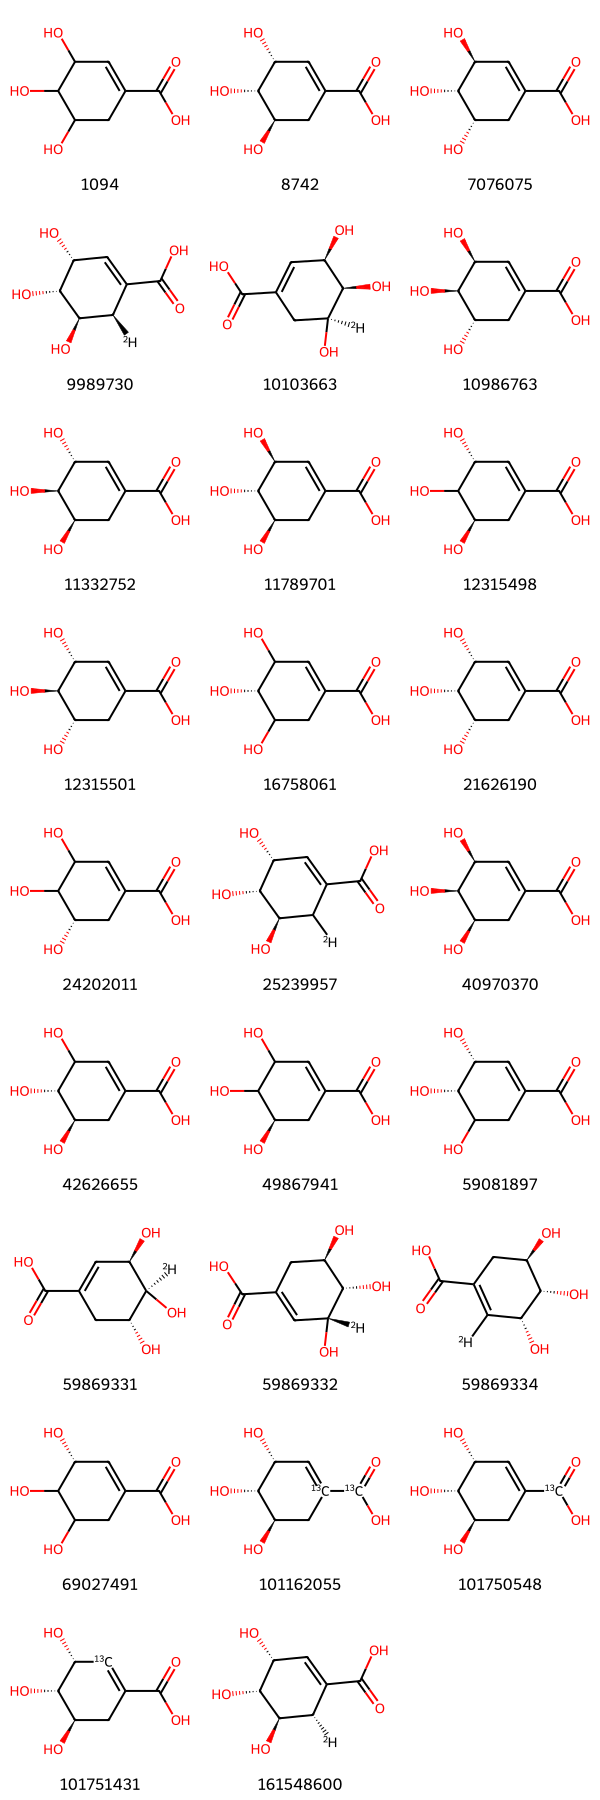

In [ ]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : "C1C(C(C(C=C1C(=O)O)O)O)O" }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("Identity_type:", myoption)

    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)

    mycids = []
    mysmiles = []

    file = io.StringIO(res.text)
    file.readline()               # Skip the first line (column heads)

    for line in file :

        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)

        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

    mols = []

    for x in mysmiles :

        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
        mols.append(mol)

    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)

    time.sleep(0.2)

##8- Obtain assays through CIDs and AIDs

###8.1 Obtain a summary of the assays for the shikimic acid

In [ ]:
# input = '/compound/cid/8742/'
# operation = 'assaysummary'
# output = '/CSV'

In [ ]:
df2=pd.read_csv("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/8742/assaysummary/CSV")
df2

,AID,Panel Member ID,SID,CID,Activity Outcome,Target GI,Target GeneID,Activity Value [uM],Activity Name,Assay Name,Assay Type,PubMed ID,RNAi
0,608,NaN,11537762,8742,Inactive,1.714984e+07,2280.0,NaN,NaN,NMR Based Screening Assay for FKBP12,Other,NaN,NaN
1,811,NaN,26528894,8742,Inactive,5.566203e+07,NaN,NaN,NaN,Primary Cell Based High Throughput Screening A...,Screening,NaN,NaN
2,833,NaN,26528894,8742,Inactive,2.578455e+06,29234.0,NaN,NaN,Primary Cell Based High Throughput Screening A...,Screening,NaN,NaN
3,875,NaN,26754400,8742,Inactive,1.390365e+09,NaN,NaN,Potency,qHTS Assay for Inhibitors of BRCT-Phosphoprote...,Confirmatory,NaN,NaN
4,880,NaN,26754400,8742,Inactive,3.290016e+06,6002.0,NaN,NaN,qHTS Assay for Inhibitors of RGS12 GoLoco Moti...,Confirmatory,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1745845,NaN,93576745,8742,Inactive,NaN,6311.0,NaN,Potency,Primary qHTS for Inhibitors of ATXN expression,Confirmatory,35787375.0,NaN
476,1745845,NaN,93576745,8742,Inactive,2.152739e+08,6311.0,NaN,Potency,Primary qHTS for Inhibitors of ATXN expression,Confirmatory,35787375.0,NaN
477,1920062,NaN,93576745,8742,Inactive,NaN,NaN,NaN,NaN,High-throughput screening primary assay to ide...,Screening,NaN,NaN
478,1963987,NaN,223712365,8742,Unspecified,NaN,NaN,NaN,NaN,HIV Cellular Data,Other,NaN,NaN


###8.2 Obtain the assay for the shikimic acid through the AID

In [ ]:
# input = '/compound/cid/8742/'
# operation = 'assaysummary'
# output = '/CSV'

In [ ]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/608/csv"
df3=pd.read_csv(url)
print("URL of the accessed assay:", url)
df3

URL of the accessed assay: https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/608/csv


,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Kd
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dissociation Constant
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR
3,1,26679181.0,16725057.0,COC1=CC(=CC(=C1OC)OC)C(=O)C(=O)N2CCCC[C@H]2C(=...,Active,80.0,http://sdccg.burnham.org,NaN,3
4,2,26679182.0,16725058.0,CC(C)C1=CC=C(C=C1)SCC(=O)O,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
...,...,...,...,...,...,...,...,...,...
3817,3815,11535282.0,1246707.0,CC1=CC(=CS1)C(=O)NC2=CC3=C(C=C2)OCO3,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3818,3816,11535283.0,1246960.0,CC1=CC(=CS1)C(=O)NCC2=CN=CC=C2,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3819,3817,11535284.0,1247116.0,CC1=C(C(=NO1)C)C(=O)NC2=CC=CC=C2SC,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3820,3818,11535285.0,1247253.0,CC1=C(SC(=C1C#N)NC(=O)C2=C(ON=C2C)C)C,Inactive,0.0,http://sdccg.burnham.org,NaN,4001


##9- Similarity exercise

Being one of the fundamental aspects of chemoinformatics, chemical similarity gives us information about the degree of similarity between different elements, molecules or chemical compounds either by their structural or functional characteristics. Although this is an easy way to understand the chemical similarity concept, there is not a definitive method.

The chemical similarity methods are addressed in two and three dimensions (2D and 3D), usually in the bidimensional methods a comparison is made from the “molecular fingerprints” to be analyzed.

Nowadays PubChem uses the [Tanimoto coefficient](https://pubchemdocs.ncbi.nlm.nih.gov/about#tanimoto) for the 2D similarity, whereas for the 3D similarity the method is based in [*“atom-centered Gaussian-shape comparison method”*](https://onlinelibrary.wiley.com/doi/abs/10.1002/%28SICI%291096-987X%2819961115%2917%3A14%3C1653%3A%3AAID-JCC7%3E3.0.CO%3B2-K).
If you want to know more about chemical similarity, you can click [here](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/04%3A_Searching_Databases_for_Chemical_Information/4.04%3A_Searching_PubChem_Using_a_Non-Textual_Query).


In [ ]:
from urllib.parse import quote
import requests

Shikimic acid structure is:


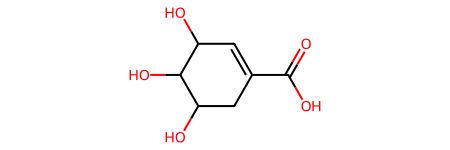

In [ ]:
query = "C1C(C(C(C=C1C(=O)O)O)O)O"
print("Shikimic acid structure is:")
Chem.MolFromSmiles(query)

In [ ]:
def query_pubchem_for_similar_compounds(smiles, threshold=75, n_records=10):
    escaped_smiles = quote(smiles).replace("/", ".")
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/{escaped_smiles}/JSON?threshold={threshold}&MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()["Waiting"]["ListKey"]
    return key

In [ ]:
job_key = query_pubchem_for_similar_compounds(query)
job_key

'2447049195370538716'

In [ ]:
def check_and_download(key, attempts=30):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/{key}/cids/JSON"
    print(f"Querying for job {key} at URL {url}...", end="")
    while attempts:
        r = requests.get(url)
        r.raise_for_status()
        response = r.json()
        if "IdentifierList" in response:
            cids = response["IdentifierList"]["CID"]
            break
        attempts -= 1
        print(".", end="")
        time.sleep(10)
    else:
        raise ValueError(f"Could not find matches for job key: {key}")
    return cids

In [ ]:
similar_cids = check_and_download(job_key)

Querying for job 2447049195370538716 at URL https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/2447049195370538716/cids/JSON...

In [ ]:
def smiles_from_pubchem_cids(cids):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{','.join(map(str, cids))}/property/CanonicalSMILES/JSON"
    r = requests.get(url)
    r.raise_for_status()
    return [item["CanonicalSMILES"] for item in r.json()["PropertyTable"]["Properties"]]

In [ ]:
similar_smiles = smiles_from_pubchem_cids(similar_cids)

In [ ]:
query_results_df = pd.DataFrame({"smiles": similar_smiles, "CIDs": similar_cids})
PandasTools.AddMoleculeColumnToFrame(query_results_df, smilesCol="smiles")
query_results_df.head(5)

,smiles,CIDs,ROMol
0,C1C(C(C(C=C1C(=O)O)O)O)O,8742,<rdkit.Chem.rdchem.Mol object at 0x7a05a5acbdf0>
1,C1C(C(C(C=C1C(=O)O)OP(=O)(O)O)O)O,121947,<rdkit.Chem.rdchem.Mol object at 0x7a05a5acbd10>
2,C1C(C(C(=O)C=C1C(=O)O)O)O,439774,<rdkit.Chem.rdchem.Mol object at 0x7a05a5a7bca0>
3,C1C(C(C(C=C1C(=O)O)O)O)O,1094,<rdkit.Chem.rdchem.Mol object at 0x7a05a5a7bf40>
4,C1C(C(C(C=C1C(=O)[O-])O)O)O,7057976,<rdkit.Chem.rdchem.Mol object at 0x7a05a5a78270>


In [ ]:
def multi_preview_smiles(query_smiles, query_name, similar_molecules_pd):
    legends = [f"PubChem CID: {str(s)}" for s in similar_molecules_pd["CIDs"].tolist()]
    molecules = [Chem.MolFromSmiles(s) for s in similar_molecules_pd["smiles"]]
    query_smiles = Chem.MolFromSmiles(query_smiles)
    return MolsToGridImage(
        [query_smiles] + molecules,
        molsPerRow=3,
        subImgSize=(300, 300),
        maxMols=len(molecules),
        legends=([query_name] + legends),
        useSVG=True,
    )

The results of querying similar compounds for Shikimic acid:


/usr/local/lib/python3.11/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  warnings.warn(


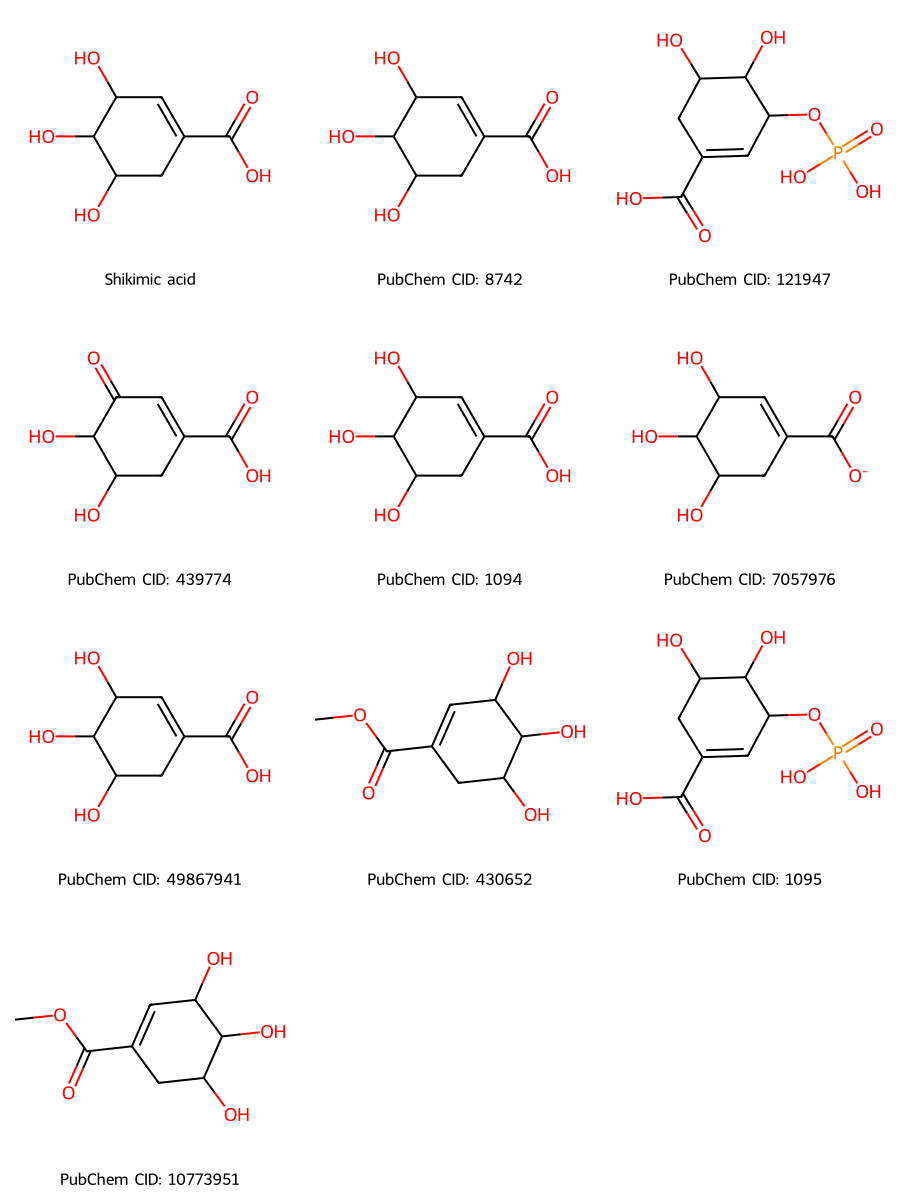

In [ ]:
print("The results of querying similar compounds for Shikimic acid:")
multi_preview_smiles(query, "Shikimic acid", query_results_df)

##10- Obtain compounds with 2D similarity from SMILES

###10.1 Obtain CIDs from compounds with 99% 2D similarity for the shikimic acid molecule from its SMILES

In [ ]:
# input = '/compound/fastsimilarity_2d/smiles/'
# operation = 'cids/ ?Theshold=99'
# output = 'txt'

In [ ]:
mydata = { 'smiles' : "C1C(C(C(C=C1C(=O)O)O)O)O" }
#where mydata will be the smiles of which we want to find similar compounds
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))

print(cids)
print ("URL:", url)


# Number of CIDs: 32
['8742', '1094', '7057976', '49867941', '10986763', '11332752', '40970370', '11789701', '12315498', '16758061', '42626655', '7076075', '9989730', '21626190', '21872888', '25239957', '59081897', '59869331', '59869332', '59869334', '69027491', '7076074', '10103663', '12315501', '24202011', '40467898', '40467899', '40467900', '101162055', '101750548', '101751431', '161548600']
URL: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99


###10.2 Obtain CIDs from compounds with 85% 2D similarity for the shikimic acid molecule from its SMILES using a function.

In [ ]:
import requests
def find_similar_compounds(smiles_query, threshold=85, n_records=10):

  prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
  input = '/smiles/' + smiles_query
  operation= '/compound/fastsimilarity_2d'
  output = '/cids/JSON'
  parameters = '?Threshold='+ str(threshold) + '&MaxRecords='+ str(n_records)

  url3 = prolog + operation + input + output + parameters
  response = requests.get (url3)

  if response.status_code == 200: #Check if the request was succcessful (status code 200)
    json_data = response.json()
    cids = json_data['IdentifierList']['CID']
    print ("CIDS:", cids)
    print ("URL:", url3)
    return cids

  else:
    print(f"Error: {response.status_code}") #Print in case request was not successful
    return None

smiles = "C1C(C(C(C=C1C(=O)O)O)O)O"
similar_compounds = find_similar_compounds(smiles_query=smiles)

CIDS: [8742, 121947, 439774, 14506806, 1094, 5460360, 7057976, 9543127, 49867941, 430652]
URL: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsimilarity_2d/smiles/C1C(C(C(C=C1C(=O)O)O)O)O/cids/JSON?Threshold=85&MaxRecords=10


**NOTE**: For the “Threshold” parameter, which is used for the similarity %, this differentiates between upper and lower case. If you use “threshold” instead of “Threshold”, this will be ignored, and the value will be 0.90.

###10.3 Make an exercise where you can compare a same search with 95%, but with the difference of “threshold” and “Threshold”.

In [ ]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"  # "threshold=95" is ignored.
res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)
cids1 = res1.text.split()
cids2 = res2.text.split()
print("# Number of CIDs:", len(cids1), "vs.", len(cids2))


# Number of CIDs: 59 vs. 168


##11- Obtain number of CIDs given by “substructure” of a compound from its SMILES.

The conformation of a chemical structure can be split into smaller structures, these small parts are called substructures of the main chemical structure. On the other hand, the big chemical structure is considered a superstructure from the smaller structures (independently of other substructures that compose it). An example would be with the shikimic acid, where for the CID structure 16129778 the shikimic acid would be a substructure of this, on the other hand, the shikimic acid is a superstructure of the CID 153767140.

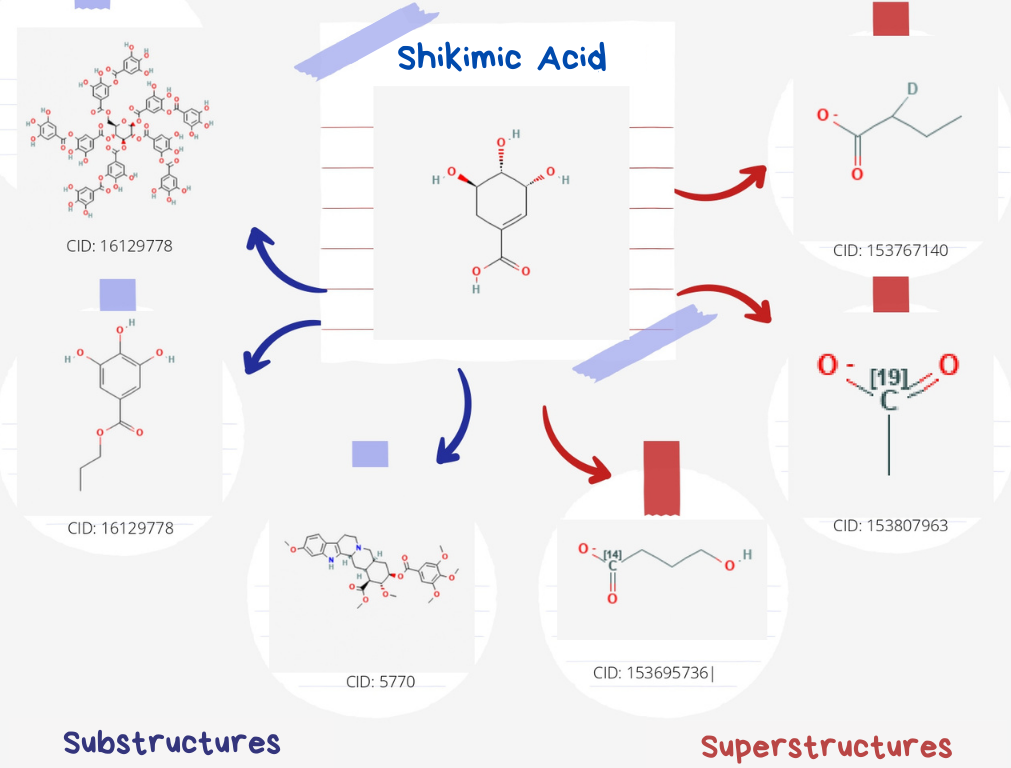

###11.1 Obtain for the shikimic acid through its SMILES, the number of CIDs that have in superstructure and substructure.

In [ ]:
# input = '/compound/fastsubstructure/smiles/'
# operation = 'cids/'
# output = 'txt?Stereo=exact'

In [ ]:
query = 'C1C(C(C(C=C1C(=O)O)O)O)O'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 38496


In [ ]:
# input = '/compound/fastsuperstructure/smiles/'
# operation = 'cids/'
# output = 'txt?Stereo=exact'

In [ ]:
query = 'C1C(C(C(C=C1C(=O)O)O)O)O'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsuperstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 2313


###11.2 Obtain for the shikimic acid through its SMARTS, the number of CIDs that have in superstructure and substructure.

In [ ]:
molecule = Chem.MolFromSmiles('C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O')
Chem.MolToSmarts(molecule)

'[#6]1-[#6@H](-[#6@@H](-[#6@@H](-[#6]=[#6]-1-[#6](=[#8])-[#8])-[#8])-[#8])-[#8]'

In [ ]:
query = '[#6]1-[#6@H](-[#6@@H](-[#6@@H](-[#6]=[#6]-1-[#6](=[#8])-[#8])-[#8])-[#8])-[#8]'
mydata = { 'smarts' : query }
url = prolog + "/compound/fastsubstructure/smarts/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 468


In [ ]:
query = '[#6]1-[#6@H](-[#6@@H](-[#6@@H](-[#6]=[#6]-1-[#6](=[#8])-[#8])-[#8])-[#8])-[#8]'
mydata = { 'smarts' : query }
url = prolog + "/compound/fastsuperstructure/smarts/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 13


#For more information:
---

* Kim S, Chen J, Cheng T, Gindulyte A, He J, He S, Li Q, Shoemaker BA, Thiessen PA, Yu B, Zaslavsky L, Zhang J, Bolton EE (2023). PubChem 2023 update. Nucleic Acids Res. 51(D1):D1373-D1380. doi:10.1093/nar/gkac956.

* About PubChem. https://pubchem.ncbi.nlm.nih.gov/docs/about Accessed: December 2023.

* Searching PubChem Using a Non-Textual Query (2019). Chemistry LibreTexts. Libretexts. https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/04%3A_Searching_Databases_for_Chemical_Information/4.04%3A_Searching_PubChem_Using_a_Non-Textual_Query. Accessed: July 2022.

* Programming Topics (2019). Chemistry LibreTexts. Libretexts. https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/04%3A_Searching_Databases_for_Chemical_Information/4.05%3A_Programming_Topics. Accessed: July 2022.

* PubChem. “Pug Rest.” https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest. Accessed: July 2023.

* Kim S, Thiessen PA, Bolton EE, Bryant SH. (2015) [PUG-SOAP and PUG-REST: web services for programmatic access to chemical information in PubChem](https://academic.oup.com/nar/article/43/W1/W605/2467896?login=false),* Nucleic Acids Res.* 43(W1) W605–W611.